<a href="https://colab.research.google.com/github/Linkabli/dap-2024/blob/main/lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №7. Классификация

Выполните следующие задания:

1. Откройте в файл в Google Colab (используйте собственный форк репозитория).
2. Решите задачи.
3. Сохраните результат в виде файла rep.ipynb в ваш репозиторий github в директорию ./les07
4. Создайте pull request в репозиторий https://github.com/chebotarevsa/dap-2024. Название pull request должно иметь формат "<Номер лабораторной работы>  <Номер группы> <ФИО>"
5. Сдайте работу в системе "Пегас", в отчет укажите ссылку на pull request

Используя набор данных titanic.csv постройте модель предсказывающую выжил или погиб пассажир.
1.	PassengerId – Идентификатор пассажира (уникальный номер для каждого пассажира).
2.	Survived – Выжил (0 – не выжил, 1 – выжил).
3.	Pclass – Класс пассажира (1 – первый класс, 2 – второй класс, 3 – третий класс).
4.	Name – Имя (полное имя пассажира).
5.	Sex – Пол (male – мужчина, female – женщина).
6.	Age – Возраст (числовое значение, может быть дробным).
7.	SibSp – Количество родственников на борту (братьев, сестер или супругов).
8.	Parch – Количество родителей или детей на борту.
9.	Ticket – Номер билета.
10.	Fare – Стоимость билета (в фунтах стерлингов).
11.	Cabin – Номер каюты (может быть пропущен, если данные отсутствуют).
12.	Embarked – Порт посадки (C – Cherbourg, Q – Queenstown, S – Southampton).

In [ ]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")

## Извлечение данных

1. Создайте DataFarame из файла titanic.csv, в качестве индекса используйте столбец "PassengerId".

In [2]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import files

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")
uploaded = files.upload()
df = pd.read_csv('titanic.csv', index_col='PassengerId')

Python version: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
Numpy version: 1.26.4
Pandas version: 2.2.2
Matplotlib version: 3.8.0


Saving titanic.csv to titanic.csv


2. Выведете первые 7 строк набора.

In [3]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import files

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")
uploaded = files.upload()
df = pd.read_csv('titanic.csv', index_col='PassengerId')
df.head(5)

Python version: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
Numpy version: 1.26.4
Pandas version: 2.2.2
Matplotlib version: 3.8.0


Saving titanic.csv to titanic (1).csv


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Подготовка данных

3. Выведете информацию о типах данных в наборе. Имеются ли в наборе не числовые признаки? Имеются ли в наборе данные имеющие значение null?
    

In [5]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import files

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")
uploaded = files.upload()
df = pd.read_csv('titanic.csv', index_col='PassengerId')
df.info()
df.isnull().sum()

Python version: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
Numpy version: 1.26.4
Pandas version: 2.2.2
Matplotlib version: 3.8.0


Saving titanic.csv to titanic (3).csv
<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


4. Удалите не числовые признаки, которые по вашему мнению, не могут влиять на заначение выжил или погиб пассажир.

In [6]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import files

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")
uploaded = files.upload()
df = pd.read_csv('titanic.csv', index_col='PassengerId')
df = df.drop(columns=['Name', 'Ticket', 'Cabin'])
df.head(5)

Python version: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
Numpy version: 1.26.4
Pandas version: 2.2.2
Matplotlib version: 3.8.0


Saving titanic.csv to titanic (4).csv


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


5. Вместо признака "Sex" (я надеюсь вы его не удалили 😂) Создайте два новых признака male и female которые содержат значения 0 или 1.

In [7]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import files

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")
uploaded = files.upload()
df = pd.read_csv('titanic.csv', index_col='PassengerId')
df = df.drop(columns=['Name', 'Ticket', 'Cabin'])
df['male'] = (df['Sex'] == 'male').astype(int)
df['female'] = (df['Sex'] == 'female').astype(int)
df = df.drop(columns=['Sex'])
df.info()
df.head(5)

Python version: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
Numpy version: 1.26.4
Pandas version: 2.2.2
Matplotlib version: 3.8.0


Saving titanic.csv to titanic (5).csv
<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
 7   male      891 non-null    int64  
 8   female    891 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 69.6+ KB


,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male,female
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,S,1,0
2,1,1,38.0,1,0,71.2833,C,0,1
3,1,3,26.0,0,0,7.9250,S,0,1
4,1,1,35.0,1,0,53.1000,S,0,1
5,0,3,35.0,0,0,8.0500,S,1,0


6. Удалите строки, которые содержать хотя бы одно null значение.

In [8]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import files

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")
uploaded = files.upload()
df = pd.read_csv('titanic.csv', index_col='PassengerId')
df = df.drop(columns=['Name', 'Ticket', 'Cabin'])
df['male'] = (df['Sex'] == 'male').astype(int)
df['female'] = (df['Sex'] == 'female').astype(int)
df = df.drop(columns=['Sex'])
df.info()
df.dropna()

Python version: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
Numpy version: 1.26.4
Pandas version: 2.2.2
Matplotlib version: 3.8.0


Saving titanic.csv to titanic (6).csv
<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
 7   male      891 non-null    int64  
 8   female    891 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 69.6+ KB


,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male,female
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,S,1,0
2,1,1,38.0,1,0,71.2833,C,0,1
3,1,3,26.0,0,0,7.9250,S,0,1
4,1,1,35.0,1,0,53.1000,S,0,1
5,0,3,35.0,0,0,8.0500,S,1,0
...,...,...,...,...,...,...,...,...,...
886,0,3,39.0,0,5,29.1250,Q,0,1
887,0,2,27.0,0,0,13.0000,S,1,0
888,1,1,19.0,0,0,30.0000,S,0,1


## Исследование данных

4. Нормализуйте значения признака "Fare".

In [10]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import files

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")
uploaded = files.upload()
df = pd.read_csv('titanic.csv', index_col='PassengerId')
df = df.drop(columns=['Name', 'Ticket', 'Cabin'])
df['male'] = (df['Sex'] == 'male').astype(int)
df['female'] = (df['Sex'] == 'female').astype(int)
df = df.drop(columns=['Sex'])
df.dropna()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Fare'] = scaler.fit_transform(df[['Fare']])
print(df[['Fare']].describe())


Python version: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
Numpy version: 1.26.4
Pandas version: 2.2.2
Matplotlib version: 3.8.0


Saving titanic.csv to titanic (8).csv
             Fare
count  891.000000
mean     0.062858
std      0.096995
min      0.000000
25%      0.015440
50%      0.028213
75%      0.060508
max      1.000000


5. Найдите разницу между средними значениями признака "Fare" для погибших и выживших пассажиров.

In [11]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import files

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")
uploaded = files.upload()
df = pd.read_csv('titanic.csv', index_col='PassengerId')
df = df.drop(columns=['Name', 'Ticket', 'Cabin'])
df['male'] = (df['Sex'] == 'male').astype(int)
df['female'] = (df['Sex'] == 'female').astype(int)
df = df.drop(columns=['Sex'])
df.dropna()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Fare'] = scaler.fit_transform(df[['Fare']])
mean_fare_dead = df[df['Survived'] == 0]['Fare'].mean()
mean_fare_survived = df[df['Survived'] == 1]['Fare'].mean()
fare_difference = mean_fare_survived - mean_fare_dead
print(f"Средняя стоимость билета для погибших: {mean_fare_dead:.2f}")
print(f"Средняя стоимость билета для выживших: {mean_fare_survived:.2f}")
print(f"Разница между средними значениями: {fare_difference:.2f}")

Python version: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
Numpy version: 1.26.4
Pandas version: 2.2.2
Matplotlib version: 3.8.0


Saving titanic.csv to titanic (9).csv
Средняя стоимость билета для погибших: 0.04
Средняя стоимость билета для выживших: 0.09
Разница между средними значениями: 0.05


6. Простройте на одной оси координат гистограмы значений признака "Fare" для погибших и выживших пассажиров.

Python version: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
Numpy version: 1.26.4
Pandas version: 2.2.2
Matplotlib version: 3.8.0


Saving titanic.csv to titanic (10).csv


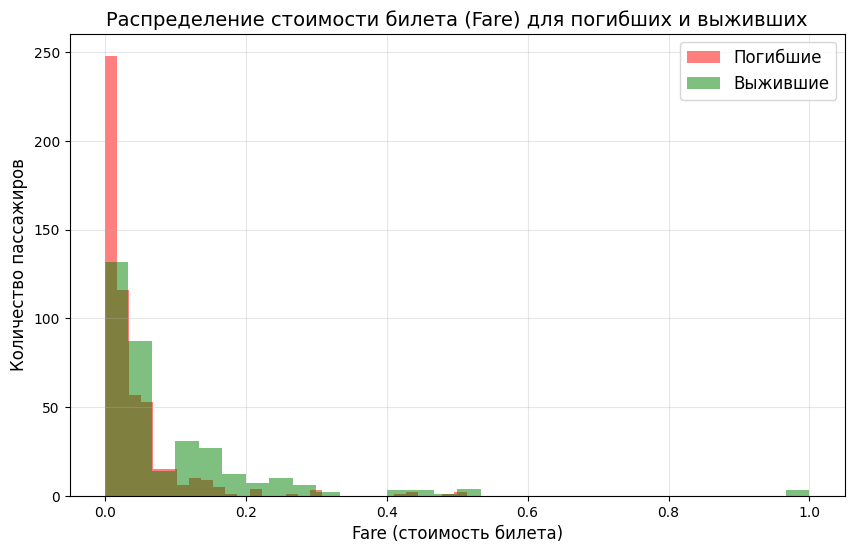

In [12]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import files

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")
uploaded = files.upload()
df = pd.read_csv('titanic.csv', index_col='PassengerId')
df = df.drop(columns=['Name', 'Ticket', 'Cabin'])
df['male'] = (df['Sex'] == 'male').astype(int)
df['female'] = (df['Sex'] == 'female').astype(int)
df = df.drop(columns=['Sex'])
df.dropna()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Fare'] = scaler.fit_transform(df[['Fare']])
fare_dead = df[df['Survived'] == 0]['Fare']
fare_survived = df[df['Survived'] == 1]['Fare']
plt.figure(figsize=(10, 6))
plt.hist(fare_dead, bins=30, alpha=0.5, label='Погибшие', color='red')
plt.hist(fare_survived, bins=30, alpha=0.5, label='Выжившие', color='green')
plt.title('Распределение стоимости билета (Fare) для погибших и выживших', fontsize=14)
plt.xlabel('Fare (стоимость билета)', fontsize=12)
plt.ylabel('Количество пассажиров', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

7. Сформируйте набор признаков (X). Сформируйте вектор целевых значений (y).

In [13]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import files

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")
uploaded = files.upload()
df = pd.read_csv('titanic.csv', index_col='PassengerId')
df = df.drop(columns=['Name', 'Ticket', 'Cabin'])
df['male'] = (df['Sex'] == 'male').astype(int)
df['female'] = (df['Sex'] == 'female').astype(int)
df = df.drop(columns=['Sex'])
df.dropna()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Fare'] = scaler.fit_transform(df[['Fare']])
fare_dead = df[df['Survived'] == 0]['Fare']
fare_survived = df[df['Survived'] == 1]['Fare']

X = df.drop(columns=['Survived'])
y = df['Survived']
print(f"Форма X: {X.shape}")
print(f"Форма y: {y.shape}")

Python version: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
Numpy version: 1.26.4
Pandas version: 2.2.2
Matplotlib version: 3.8.0


Saving titanic.csv to titanic (11).csv
Форма X: (891, 8)
Форма y: (891,)


## Предсказательная модель

8. Разделите набор данных на два, одни для обучения модели другой для проверки. Тестовый набор должен содержать 25 процентов данных.

In [14]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import files

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")
uploaded = files.upload()
df = pd.read_csv('titanic.csv', index_col='PassengerId')
df = df.drop(columns=['Name', 'Ticket', 'Cabin'])
df['male'] = (df['Sex'] == 'male').astype(int)
df['female'] = (df['Sex'] == 'female').astype(int)
df = df.drop(columns=['Sex'])
df.dropna()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Fare'] = scaler.fit_transform(df[['Fare']])
fare_dead = df[df['Survived'] == 0]['Fare']
fare_survived = df[df['Survived'] == 1]['Fare']


from sklearn.model_selection import train_test_split
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f"Размер обучающего набора X: {X_train.shape}")
print(f"Размер тестового набора X: {X_test.shape}")
print(f"Размер обучающего набора y: {y_train.shape}")
print(f"Размер тестового набора y: {y_test.shape}")

Python version: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
Numpy version: 1.26.4
Pandas version: 2.2.2
Matplotlib version: 3.8.0


Saving titanic.csv to titanic (12).csv
Размер обучающего набора X: (668, 8)
Размер тестового набора X: (223, 8)
Размер обучающего набора y: (668,)
Размер тестового набора y: (223,)


9. Выполните обучение модели.

In [17]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import files
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")
uploaded = files.upload()
df = pd.read_csv('titanic.csv', index_col='PassengerId')
df = df.drop(columns=['Name', 'Ticket', 'Cabin'])
df['male'] = (df['Sex'] == 'male').astype(int)
df['female'] = (df['Sex'] == 'female').astype(int)
df = df.drop(columns=['Sex'])
label_encoder = LabelEncoder()
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])
df.dropna(inplace=True)
scaler = MinMaxScaler()
df['Fare'] = scaler.fit_transform(df[['Fare']])
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("\nКлассификационный отчет:")
print(classification_report(y_test, y_pred))

Python version: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
Numpy version: 1.26.4
Pandas version: 2.2.2
Matplotlib version: 3.8.0


Saving titanic.csv to titanic (15).csv
Точность модели: 0.7598

Классификационный отчет:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       107
           1       0.73      0.64      0.68        72

    accuracy                           0.76       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.76      0.76      0.76       179


Матрица ошибок:
[[90 17]
 [26 46]]


## Проверка модели

10. Выведите мартицу ошибок

In [ ]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import files
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")
uploaded = files.upload()
df = pd.read_csv('titanic.csv', index_col='PassengerId')
df = df.drop(columns=['Name', 'Ticket', 'Cabin'])
df['male'] = (df['Sex'] == 'male').astype(int)
df['female'] = (df['Sex'] == 'female').astype(int)
df = df.drop(columns=['Sex'])
label_encoder = LabelEncoder()
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])
df.dropna(inplace=True)
scaler = MinMaxScaler()
df['Fare'] = scaler.fit_transform(df[['Fare']])
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("\nКлассификационный отчет:")
print(classification_report(y_test, y_pred))
print("\nМатрица ошибок:")
print(confusion_matrix(y_test, y_pred))

11. Расчитайте accuracy

In [ ]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import files
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")
uploaded = files.upload()
df = pd.read_csv('titanic.csv', index_col='PassengerId')
df = df.drop(columns=['Name', 'Ticket', 'Cabin'])
df['male'] = (df['Sex'] == 'male').astype(int)
df['female'] = (df['Sex'] == 'female').astype(int)
df = df.drop(columns=['Sex'])
label_encoder = LabelEncoder()
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])
df.dropna(inplace=True)
scaler = MinMaxScaler()
df['Fare'] = scaler.fit_transform(df[['Fare']])
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.4f}")
print("\nКлассификационный отчет:")
print(classification_report(y_test, y_pred))
print("\nМатрица ошибок:")
print(confusion_matrix(y_test, y_pred))

В ходе выполнения работы мы сосредоточились на решении задачи классификации, используя набор данных о пассажирах Титаника, с целью предсказания выживания пассажира на основе различных признаков, таких как возраст, пол, класс, стоимость билета и другие.

## Вопросы для защиты

1. Сформулируйте задачу классификации.

Задача классификации — это тип задачи машинного обучения, в которой требуется определить категорию или класс, к которому принадлежит объект, основываясь на его признаках. В задачах классификации целевой переменной является категориальная (дискретная), и модель предсказывает метку класса для новых наблюдений. Пример: Прогнозирование того, выживет ли пассажир на Титанике, на основе его характеристик (возраст, пол, класс и т. д.)
2. Перечислите типы классификации.

1) Бинарная классификация — задача, в которой есть два класса, и модель должна предсказать, к какому из них относится объект. Пример: выявление спама в почте (спам или не спам).

2) Мультиклассовая классификация — задача, где есть несколько классов, и модель должна выбрать один из них. Пример: классификация видов животных (кот, собака, птица и т. д.).

3) Мульти-меточная классификация — задача, в которой для каждого объекта могут быть предсказаны несколько меток. Пример: классификация фильмов по нескольким жанрам (боевик, комедия и т. д.).

4) Многоклассовая классификация с несколькими метками — каждый объект может иметь несколько классов одновременно, но для каждого класса строится отдельная модель.

3. В чем особенность несбалансированной классификации?

Несбалансированная классификация происходит, когда количество примеров одного класса значительно больше, чем количество примеров другого класса. Это может привести к тому, что модель будет плохо распознавать меньшинство, поскольку её ошибки для этого класса будут менее значимыми по сравнению с ошибками для доминирующего класса. Например, в задаче классификации болезни (здоровый/больной), если большинство примеров здоровые люди, модель может игнорировать меньшинство (больных). Решение: использование различных методов, таких как взвешивание классов, перераспределение данных или методы сгенерированного множества данных.

4. В чем особенность мультиклассовой классификации?

Мультиклассовая классификация отличается от бинарной тем, что нужно предсказать один из нескольких возможных классов, а не два. При этом подходы к обработке ошибок и стратегии обучения могут быть сложнее. Обычно используется метод "Один против всех" или "Один против одного", в зависимости от задачи.

5. В чем особенность бинарной классификации?

В бинарной классификации модель должна разделить данные на два класса. Например, в задаче распознавания болезни (болен или здоров) модель будет предсказывать либо один, либо второй класс. В отличие от мультиклассовой классификации, здесь только два возможных исхода.

6. В чем особенность классификации по нескольким меткам?

В классификации по нескольким меткам для каждого объекта может быть предсказано несколько классов одновременно. Например, для фильма могут быть предсказаны несколько жанров: комедия, боевик, драма. Это отличается от обычной классификации, где каждому объекту соответствует только один класс.

7. Чем стратегия "Один против всех" отличается от стратегии "Один против одного"?

1) "Один против всех" (One-vs-All): для каждой категории строится отдельная бинарная классификация, которая определяет, принадлежит ли объект данному классу или нет. В итоге результат предсказания будет классом, который дал наибольшую уверенность.

2) "Один против одного" (One-vs-One): для каждой пары классов строится бинарный классификатор. Это приводит к тому, что модель создаёт большее количество классификаторов, но результат предсказания зависит от большинства решений этих классификаторов.

8. Что такое матрица ошибок (несоответствий)?

Матрица ошибок (или confusion matrix) — это таблица, которая используется для оценки качества классификации. Она показывает количество правильных и неправильных классификаций для каждого класса. Матрица имеет форму:

- True Positives (TP): количество объектов, которые правильно отнесены к положительному классу.
- True Negatives (TN): количество объектов, которые правильно отнесены к отрицательному классу.
- False Positives (FP): количество объектов, которые ошибочно отнесены к положительному классу.
- False Negatives (FN): количество объектов, которые ошибочно отнесены к отрицательному классу.
9. Как рассчитывается Accuracy?

Accuracy (точность) измеряет, как часто модель в среднем дает правильный прогноз. Это значение рассчитывается следующим образом: (TP + TN) / (все прогнозы).

10. Объясните алгоритм классификации K-ближайших соседей.

Алгоритм K-ближайших соседей (K-Nearest Neighbors, K-NN) является простым и интуитивно понятным методом классификации. Он работает следующим образом:

1) Для каждого объекта, который нужно классифицировать, вычисляется расстояние до всех объектов в обучающем наборе (например, с помощью Евклидова расстояния).

2) Из всех объектов выбираются K ближайших (по расстоянию) объектов.

3) Класс нового объекта определяется на основе большинства классов среди этих K ближайших объектов. Например, если среди ближайших соседей 3 из 5 объектов принадлежат классу A, а остальные 2 — классу B, то новый объект будет отнесён к классу A.

4) K — это параметр, который задаёт количество ближайших соседей для принятия решения.